<a href="https://colab.research.google.com/github/niruthikka24/Intro-to-ML-Labs/blob/main/Lab%202/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn import ensemble
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm

In [ ]:
up = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,AT,V,AP,RH,EP
0,1,28.62,69.71,1009.67,62.12,437.52
1,2,14.84,41.48,1017.26,63.42,460.30
2,3,26.04,74.67,1016.68,81.20,433.55
3,4,13.55,42.99,1007.58,97.55,470.82
4,5,20.10,59.87,1018.97,87.23,444.71


In [ ]:
df.isna().sum()

ID    0
AT    0
V     0
AP    0
RH    0
EP    0
dtype: int64

In [ ]:
print(df.shape)
df.drop_duplicates(subset=df.columns.difference(['ID']),inplace=True)
print(df.shape)

(8500, 6)
(8466, 6)


In [ ]:
df.describe()

,ID,AT,V,AP,RH,EP
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.00000
mean,4250.500000,19.656261,54.310672,1013.254513,73.354868,454.33872
std,2453.882977,7.451720,12.699757,5.936605,14.628062,17.06837
min,1.000000,1.810000,25.360000,992.890000,25.560000,420.26000
25%,2125.750000,13.527500,41.740000,1009.117500,63.380000,439.72750
50%,4250.500000,20.360000,52.080000,1012.945000,75.025000,451.44000
75%,6375.250000,25.712500,66.540000,1017.240000,84.920000,468.43000
max,8500.000000,35.770000,80.250000,1033.290000,100.160000,495.76000


In [ ]:
x = df.loc[:, ['AT','V','AP','RH']]
y = df['EP']

In [ ]:
def metrics(ytest,pred,trainx):
  print("MAE", mae(ytest, pred))
  print("MSE", mse(ytest,pred))
  print("RMSE", np.sqrt(mse(ytest,pred)))
  r2score = r2(ytest,pred)
  print("r2score", r2score)
  n=len(trainx)
  k=4
  adj_r2_score = 1 - ((1-r2score)*(n-1)/(n-k-1))
  print("adjr2lis", adj_r2_score)

In [ ]:
#for train, validation and test split
trainx, X_test, trainy, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #, stratify=y

In [ ]:
scaler = StandardScaler()
# transform data
stdscaled = x.copy(deep=True)
stdscaled[stdscaled.columns] = scaler.fit_transform(stdscaled[stdscaled.columns])
# stdscaled = scaler.fit_transform(x)
stdscaled.head()

,AT,V,AP,RH
0,1.203351,1.215550,-0.600256,-0.769345
1,-0.647792,-1.010974,0.677978,-0.680519
2,0.856765,1.606749,0.580300,0.534339
3,-0.821084,-0.891879,-0.952233,1.651490
4,0.058813,0.439461,0.965960,0.946353


In [ ]:
scaler = MinMaxScaler()
# transform data
minscaled = x.copy(deep=True)
minscaled[minscaled.columns] = scaler.fit_transform(minscaled[minscaled.columns])
# stdscaled = scaler.fit_transform(x)
minscaled.head()

,AT,V,AP,RH
0,0.789458,0.807980,0.415347,0.490080
1,0.383687,0.293678,0.603218,0.507507
2,0.713486,0.898342,0.588861,0.745845
3,0.345701,0.321188,0.363614,0.965013
4,0.538575,0.628712,0.645545,0.826676


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('KN', KNeighborsRegressor()))
models.append(('XG', XGBRegressor()))
models.append(('LG',LGBMRegressor()))
models.append(('GBT',ensemble.GradientBoostingRegressor()))

In [ ]:
names = []
scores = []
maes = []
# for name, model in models:
#     model.fit(xtrain, ytrain)
#     y_pred = model.predict(xtest)
#     scores.append(accuracy_score(ytest, y_pred))
#     maes.append(mae(ytest, y_pred))
#     names.append(name)
# tr_split = pd.DataFrame({'Name': names, 'Score': scores, 'MAE': maes})
# print(tr_split)
scorer = make_scorer(mae)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    score = cross_val_score(model, x, y, cv=kfold, scoring=scorer).mean()

    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

[10:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
names = []
scores = []
maes = []

scorer = make_scorer(mae)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    score = cross_val_score(model, stdscaled, y, cv=kfold, scoring=scorer).mean()

    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

[10:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
names = []
scores = []
maes = []

scorer = make_scorer(mae)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    score = cross_val_score(model, minscaled, y, cv=kfold, scoring=scorer).mean()

    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

[10:41:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [25,50,75,100,125,150]# 300, 1000
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(minscaled, y)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'bootstrap': True, 'max_depth': 90, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 150}


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(minscaled, y, random_state=0,test_size=0.2)
rf = RandomForestRegressor(random_state = 0, n_estimators = 150,max_depth=90,min_samples_leaf=3,min_samples_split=8,bootstrap=True)
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
mae(ytest, pred)

2.494695492875848

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(minscaled, y, random_state=0,test_size=0.2)
for val in [5,10,20,50,100,200,250,500,750,1000,1250,1500,1750,2000]:
  rf = RandomForestRegressor(n_estimators = val, random_state = 0)
  rf.fit(xtrain, ytrain)
  pred = rf.predict(xtest)
  maescore = mae(ytest, pred)
  print("n_est: " + str(val) + " and MAE : " + str(maescore))

n_est: 5 and MAE : 2.65127626918536
n_est: 10 and MAE : 2.5187721369539546
n_est: 20 and MAE : 2.464242030696576
n_est: 50 and MAE : 2.4213847697756763
n_est: 100 and MAE : 2.406767532467517
n_est: 200 and MAE : 2.4088016824084844
n_est: 250 and MAE : 2.413558110979917
n_est: 500 and MAE : 2.4089432231405237
n_est: 750 and MAE : 2.408605470287268
n_est: 1000 and MAE : 2.4079391263281438
n_est: 1250 and MAE : 2.406807952774422
n_est: 1500 and MAE : 2.4067329830774917
n_est: 1750 and MAE : 2.40716959352335
n_est: 2000 and MAE : 2.4070951033058194


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
lgb = LGBMRegressor(max_depth=75,learning_rate=0.1,num_leaves=2*75)
lgb.fit(xtrain, ytrain)
pred = lgb.predict(xtest)
maescore = mae(ytest, pred)
print(maescore)

2.247336501975042


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(minscaled, y, random_state=0,test_size=0.2)
lgb = LGBMRegressor(max_depth=75,learning_rate=0.1,num_leaves=2*75)
lgb.fit(xtrain, ytrain)
pred = lgb.predict(xtest)
maescore = mae(ytest, pred)
print(maescore)

2.2590660136010774


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(stdscaled, y, random_state=0,test_size=0.2)
lgb = LGBMRegressor(max_depth=75,learning_rate=0.1,num_leaves=2*75)
lgb.fit(xtrain, ytrain)
pred = lgb.predict(xtest)
maescore = mae(ytest, pred)
print(maescore)

2.2605752203623948


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(minscaled, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [0.1]: #0.0001, 0.001, 0.01, 0.1, 1.0
    lgb = LGBMRegressor(max_depth=val,learning_rate=l,num_leaves=2*val)
    lgb.fit(xtrain, ytrain)
    pred = lgb.predict(xtest)
    maescore = mae(ytest, pred)
    print("max_depth: " + str(val) + " and rate : " + str(l) + " and MAE : " + str(maescore))
    print("================================")

max_depth: 1 and rate : 0.1 and MAE : 3.336568832187354
max_depth: 5 and rate : 0.1 and MAE : 2.856888393140045
max_depth: 10 and rate : 0.1 and MAE : 2.63485699927566
max_depth: 15 and rate : 0.1 and MAE : 2.5093600832415532
max_depth: 20 and rate : 0.1 and MAE : 2.419875211469589
max_depth: 25 and rate : 0.1 and MAE : 2.397590137596002
max_depth: 30 and rate : 0.1 and MAE : 2.3492397394711904
max_depth: 50 and rate : 0.1 and MAE : 2.2893989248919824
max_depth: 75 and rate : 0.1 and MAE : 2.2590660136010774
max_depth: 100 and rate : 0.1 and MAE : 2.2412777839844655


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(stdscaled, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [0.1]: #0.0001, 0.001, 0.01, 0.1, 1.0
    lgb = LGBMRegressor(max_depth=val,learning_rate=l,num_leaves=2*val)
    lgb.fit(xtrain, ytrain)
    pred = lgb.predict(xtest)
    maescore = mae(ytest, pred)
    print("max_depth: " + str(val) + " and rate : " + str(l) + " and MAE : " + str(maescore))
    print("================================")

max_depth: 1 and rate : 0.1 and MAE : 3.333865561046493
max_depth: 5 and rate : 0.1 and MAE : 2.8401625751668176
max_depth: 10 and rate : 0.1 and MAE : 2.636428586597994
max_depth: 15 and rate : 0.1 and MAE : 2.4972377254233713
max_depth: 20 and rate : 0.1 and MAE : 2.432871343924328
max_depth: 25 and rate : 0.1 and MAE : 2.403600568230867
max_depth: 30 and rate : 0.1 and MAE : 2.3518660927443507
max_depth: 50 and rate : 0.1 and MAE : 2.2571673471062934
max_depth: 75 and rate : 0.1 and MAE : 2.2605752203623948
max_depth: 100 and rate : 0.1 and MAE : 2.265577147202236


In [ ]:
maxdepth=[]
# learningrate = []
maelis=[]
mselis = []
rmselis=[]
r2lis=[]
adjr2lis=[]

In [ ]:
x.head()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [5,10,15,25,50,75,100,125,150]:
  lgb = LGBMRegressor(max_depth=val,learning_rate=0.1,num_leaves=2*val)
  lgb.fit(xtrain, ytrain)
  pred = lgb.predict(xtest)
  maxdepth.append(val)
  # learningrate.append(l)
  maelis.append(mae(ytest, pred))
  mselis.append(mse(ytest,pred))
  rmselis.append(np.sqrt(mse(ytest,pred)))
  r2score = r2(ytest,pred)
  r2lis.append(r2score)
  n=len(x)
  k=4
  adj_r2_score = 1 - ((1-r2score)*(n-1)/(n-k-1))
  adjr2lis.append(adj_r2_score)
  # print("max_depth: " + str(val) + " and rate : " + str(l) + " and MAE : " + str(maescore))
  # print("================================")

In [ ]:
lgbdf = pd.DataFrame(list(zip(maxdepth,maelis,mselis,rmselis,r2lis,adjr2lis)), columns =['max_depth', 'MAE','MSE','RMSE','RSquared','Adjusted RSquared'])
lgbdf

,max_depth,MAE,MSE,RMSE,RSquared,Adjusted RSquared
0,5,2.862358,13.451827,3.667673,0.952702,0.952680
1,5,2.862358,13.451827,3.667673,0.952702,0.958998
2,10,2.629816,11.655857,3.414068,0.959017,0.961472
3,15,2.530653,10.952450,3.309449,0.961490,0.965623
4,25,2.381208,9.772380,3.126081,0.965640,0.967770
5,50,2.266980,9.162252,3.026921,0.967785,0.968106
6,75,2.247337,9.066555,3.011072,0.968121,0.967954
7,100,2.257900,9.109970,3.018273,0.967969,0.967650
8,125,2.261872,9.196151,3.032516,0.967666,0.967643


In [ ]:
nest=[]
gamlis = []
maxlis = []
maelis=[]
mselis = []
rmselis=[]
r2lis=[]
adjr2lis=[]

In [ ]:
#XGBRegressor(n_estimators=1000,gamma=1,max_depth=7,objective='reg:squarederror')
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [500,1000]:
  for l in [1,3]:
    for m in [7,10]:
      model = XGBRegressor(n_estimators=val,gamma=l,max_depth=m,objective='reg:squarederror')
      model.fit(xtrain, ytrain)
      pred = model.predict(xtest)
      nest.append(val)
      gamlis.append(l)
      maxlis.append(m)
      maelis.append(mae(ytest, pred))
      mselis.append(mse(ytest,pred))
      rmselis.append(np.sqrt(mse(ytest,pred)))
      r2score = r2(ytest,pred)
      r2lis.append(r2score)
      n=len(x)
      k=4
      adj_r2_score = 1 - ((1-r2score)*(n-1)/(n-k-1))
      adjr2lis.append(adj_r2_score)

In [ ]:
xgbdf = pd.DataFrame(list(zip(nest,gamlis,maxlis,maelis,mselis,rmselis,r2lis,adjr2lis)), columns =['n_estimators','gamma','max_depth', 'MAE','MSE','RMSE','RSquared','Adjusted RSquared'])
xgbdf

,n_estimators,gamma,max_depth,MAE,MSE,RMSE,RSquared,Adjusted RSquared
0,500,1,7,2.133156,8.588805,2.930666,0.969801,0.969787
1,500,1,10,2.135273,8.485349,2.912962,0.970165,0.970151
2,500,3,7,2.188468,8.768044,2.961088,0.969171,0.969156
3,500,3,10,2.148468,8.678499,2.945929,0.969486,0.969471
4,1000,1,7,2.131403,8.606785,2.933732,0.969738,0.969724
5,1000,1,10,2.135273,8.485349,2.912962,0.970165,0.970151
6,1000,3,7,2.188468,8.768044,2.961088,0.969171,0.969156
7,1000,3,10,2.148468,8.678499,2.945929,0.969486,0.969471


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
model = XGBRegressor(n_estimators=1000,gamma=1,max_depth=7,objective='reg:squarederror')
model.fit(xtrain, ytrain)
print("Training Accuracy: - ")
metrics(ytrain,model.predict(xtrain),xtrain)
print("========================================================")
pred = model.predict(xtest)
metrics(ytest,pred,xtest)

Training Accuracy: - 
MAE 0.7394658845201866
MSE 1.0260212852106407
RMSE 1.0129270878057515
r2score 0.99648466896416
adjr2lis 0.9964825910383224
MAE 2.131402535286535
MSE 8.606785095884803
RMSE 2.933732280881267
r2score 0.9697379018693589
adjr2lis 0.969666233194094


In [ ]:
def plotscores(df,parameter,scorecols,model):
  fig = plt.figure(figsize=(8, 6))
  colors = ['blue','orange','green']
  i=0
  for col in scorecols:
    plt.plot(df[parameter], df[col], label=col,
            linewidth=3, marker='o',color=colors[i])
    i += 1

  # Add title and labels

  plt.title(model)
  plt.xlabel(parameter)
  plt.ylabel('Score')

  plt.legend()

  plt.tight_layout()
  plt.show()

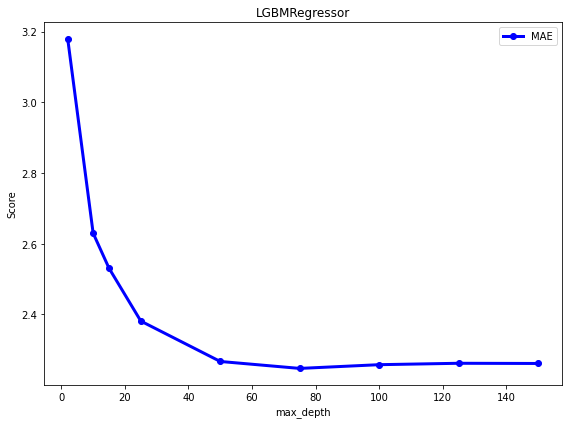

In [ ]:
scorecols = ['MAE']
plotscores(lgbdf,'max_depth',scorecols,'LGBMRegressor')

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(trainx, trainy, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      model = XGBRegressor(n_estimators=val,gamma=l,max_depth=m,objective='reg:squarederror')
      model.fit(xtrain, ytrain)
      pred = model.predict(xtest)
      maescore = mae(ytest, pred)
      print("max_depth: " + str(m) + " and gamma : " + str(l) + " and n_estimators : " + str(val) + " and MAE : " + str(maescore))


max_depth: 3 and gamma : 1 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 5 and gamma : 1 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 7 and gamma : 1 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 10 and gamma : 1 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 3 and gamma : 3 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 5 and gamma : 3 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 7 and gamma : 3 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 10 and gamma : 3 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 3 and gamma : 5 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 5 and gamma : 5 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 7 and gamma : 5 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 10 and gamma : 5 and n_estimators : 1 and MAE : 408.06125792123913
max_depth: 3 and gamma : 7 and n_estimators : 1 and MAE : 408.06125792123

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(trainx, trainy, random_state=0,test_size=0.2)
for val in [125,150,250,500,750,1000]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      model = XGBRegressor(n_estimators=val,gamma=l,max_depth=m,objective='reg:squarederror')
      model.fit(xtrain, ytrain)
      pred = model.predict(xtest)
      maescore = mae(ytest, pred)
      print("max_depth: " + str(m) + " and gamma : " + str(l) + " and n_estimators : " + str(val) + " and MAE : " + str(maescore))


max_depth: 3 and gamma : 1 and n_estimators : 125 and MAE : 2.8930747962191536
max_depth: 5 and gamma : 1 and n_estimators : 125 and MAE : 2.5962899579825875
max_depth: 7 and gamma : 1 and n_estimators : 125 and MAE : 2.395726599436404
max_depth: 10 and gamma : 1 and n_estimators : 125 and MAE : 2.1742352479603895
max_depth: 3 and gamma : 3 and n_estimators : 125 and MAE : 2.8930747962191536
max_depth: 5 and gamma : 3 and n_estimators : 125 and MAE : 2.6069935982904746
max_depth: 7 and gamma : 3 and n_estimators : 125 and MAE : 2.3731148857313764
max_depth: 10 and gamma : 3 and n_estimators : 125 and MAE : 2.2297801022687955
max_depth: 3 and gamma : 5 and n_estimators : 125 and MAE : 2.876685928851476
max_depth: 5 and gamma : 5 and n_estimators : 125 and MAE : 2.583741522644719
max_depth: 7 and gamma : 5 and n_estimators : 125 and MAE : 2.3848753846791393
max_depth: 10 and gamma : 5 and n_estimators : 125 and MAE : 2.2209516006976475
max_depth: 3 and gamma : 7 and n_estimators : 125 an

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(trainx, trainy, random_state=0,test_size=0.2)
model = XGBRegressor(n_estimators=750,gamma=1,max_depth=10,objective='reg:squarederror')
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print("MAE", mae(ytest, pred))
print("MSE", mse(ytest,pred))
print("RMSE", np.sqrt(mse(ytest,pred)))
r2score = r2(ytest,pred)
print("r2score", r2score)
n=len(trainx)
k=4
adj_r2_score = 1 - ((1-r2score)*(n-1)/(n-k-1))
print("adjr2lis", adj_r2_score)

MAE 2.1225039972396793
MSE 9.008316390972519
RMSE 3.0013857451138333
r2score 0.9701699004524095
adjr2lis 0.9701522677646319


In [ ]:
def metrics(ytest,pred,trainx):
  print("MAE", mae(ytest, pred))
  print("MSE", mse(ytest,pred))
  print("RMSE", np.sqrt(mse(ytest,pred)))
  r2score = r2(ytest,pred)
  print("r2score", r2score)
  n=len(trainx)
  k=4
  adj_r2_score = 1 - ((1-r2score)*(n-1)/(n-k-1))
  print("adjr2lis", adj_r2_score)

In [ ]:
# model = XGBRegressor(n_estimators=val,gamma=l,max_depth=m,objective='reg:squarederror')
# model.fit(xtrain, ytrain)
predtest = model.predict(X_test)
metrics(y_test,predtest,X_test)
# maescore = mae(y_test, predtest)

MAE 2.2236691215722306
MSE 9.400090770039847
RMSE 3.065956746276739
r2score 0.9669485799690883
adjr2lis 0.9668703054397079


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [125,150,250,500,750,1000]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      model = XGBRegressor(n_estimators=val,gamma=l,max_depth=m,objective='reg:squarederror')
      model.fit(xtrain, ytrain)
      pred = model.predict(xtest)
      maescore = mae(ytest, pred)
      print("max_depth: " + str(m) + " and gamma : " + str(l) + " and n_estimators : " + str(val) + " and MAE : " + str(maescore))

max_depth: 3 and gamma : 1 and n_estimators : 125 and MAE : 2.887073284553079
max_depth: 5 and gamma : 1 and n_estimators : 125 and MAE : 2.5659912612017455
max_depth: 7 and gamma : 1 and n_estimators : 125 and MAE : 2.3178956729664515
max_depth: 10 and gamma : 1 and n_estimators : 125 and MAE : 2.1971957727768836
max_depth: 3 and gamma : 3 and n_estimators : 125 and MAE : 2.886896210793888
max_depth: 5 and gamma : 3 and n_estimators : 125 and MAE : 2.5557938368853397
max_depth: 7 and gamma : 3 and n_estimators : 125 and MAE : 2.3582666525448066
max_depth: 10 and gamma : 3 and n_estimators : 125 and MAE : 2.1576689862419562
max_depth: 3 and gamma : 5 and n_estimators : 125 and MAE : 2.8978304709041818
max_depth: 5 and gamma : 5 and n_estimators : 125 and MAE : 2.510450729549632
max_depth: 7 and gamma : 5 and n_estimators : 125 and MAE : 2.3351165527343745
max_depth: 10 and gamma : 5 and n_estimators : 125 and MAE : 2.1611149320714604
max_depth: 3 and gamma : 7 and n_estimators : 125 an

In [ ]:
## Define our candidate hyperparameters
#hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]
xtrain, xtest, ytrain, ytest = train_test_split(minscaled, y, random_state=0,test_size=0.2)
for n in [2,3,4,5,6,7,8,9,10]:
  for w in ['uniform','distance']:
    model = KNeighborsRegressor(n_neighbors=n,weights=w)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    maescore = mae(ytest, pred)
    print("neighbors: " + str(n) + " and weights : " + w + " and MAE : " + str(maescore))

neighbors: 2 and weights : uniform and MAE : 2.792700708382526
neighbors: 2 and weights : distance and MAE : 2.7499757950253456
neighbors: 3 and weights : uniform and MAE : 2.7035045257772534
neighbors: 3 and weights : distance and MAE : 2.6443442782387665
neighbors: 4 and weights : uniform and MAE : 2.718012101534829
neighbors: 4 and weights : distance and MAE : 2.6145112630703857
neighbors: 5 and weights : uniform and MAE : 2.7783778040141667
neighbors: 5 and weights : distance and MAE : 2.6326782729497404
neighbors: 6 and weights : uniform and MAE : 2.78362160566706
neighbors: 6 and weights : distance and MAE : 2.6345190071614866
neighbors: 7 and weights : uniform and MAE : 2.822851239669421
neighbors: 7 and weights : distance and MAE : 2.6532430824379842
neighbors: 8 and weights : uniform and MAE : 2.8407733175914998
neighbors: 8 and weights : distance and MAE : 2.6586116026263285
neighbors: 9 and weights : uniform and MAE : 2.8769749442476695
neighbors: 9 and weights : distance an

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(stdscaled, y, random_state=0,test_size=0.2)
for n in [2,3,4,5,6,7,8,9,10]:
  for w in ['uniform','distance']:
    model = KNeighborsRegressor(n_neighbors=n,weights=w)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    maescore = mae(ytest, pred)
    print("neighbors: " + str(n) + " and weights : " + w + " and MAE : " + str(maescore))

neighbors: 2 and weights : uniform and MAE : 2.8052951593860698
neighbors: 2 and weights : distance and MAE : 2.758361834881399
neighbors: 3 and weights : uniform and MAE : 2.7732310114128302
neighbors: 3 and weights : distance and MAE : 2.6918399789589103
neighbors: 4 and weights : uniform and MAE : 2.766741440377805
neighbors: 4 and weights : distance and MAE : 2.6549748451291983
neighbors: 5 and weights : uniform and MAE : 2.8038583234946874
neighbors: 5 and weights : distance and MAE : 2.657127606230365
neighbors: 6 and weights : uniform and MAE : 2.8187937819756015
neighbors: 6 and weights : distance and MAE : 2.6617082135338426
neighbors: 7 and weights : uniform and MAE : 2.8292115027829317
neighbors: 7 and weights : distance and MAE : 2.6617244630607266
neighbors: 8 and weights : uniform and MAE : 2.8500678866587963
neighbors: 8 and weights : distance and MAE : 2.6739045797895304
neighbors: 9 and weights : uniform and MAE : 2.8771953299226034
neighbors: 9 and weights : distance 

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
for n in [2,3,4,5,6,7,8,9,10]:
  for w in ['uniform','distance']:
    model = KNeighborsRegressor(n_neighbors=n,weights=w)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    maescore = mae(ytest, pred)
    print("neighbors: " + str(n) + " and weights : " + w + " and MAE : " + str(maescore))

neighbors: 2 and weights : uniform and MAE : 2.936685360094451
neighbors: 2 and weights : distance and MAE : 2.899016678614087
neighbors: 3 and weights : uniform and MAE : 2.9251574183392366
neighbors: 3 and weights : distance and MAE : 2.829465435622464
neighbors: 4 and weights : uniform and MAE : 2.9191632231404947
neighbors: 4 and weights : distance and MAE : 2.786268230705027
neighbors: 5 and weights : uniform and MAE : 2.9601074380165286
neighbors: 5 and weights : distance and MAE : 2.8007467108331294
neighbors: 6 and weights : uniform and MAE : 2.9854240456513175
neighbors: 6 and weights : distance and MAE : 2.8010979280154933
neighbors: 7 and weights : uniform and MAE : 3.0098296508686113
neighbors: 7 and weights : distance and MAE : 2.8130150755226713
neighbors: 8 and weights : uniform and MAE : 3.0435758559622204
neighbors: 8 and weights : distance and MAE : 2.8417268618507787
neighbors: 9 and weights : uniform and MAE : 3.058584546766365
neighbors: 9 and weights : distance an

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,test_size=0.2)
for n in [5,10,15,20,25,50]:
  for w in ['uniform','distance']:
    model = KNeighborsRegressor(n_neighbors=n,weights=w)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    maescore = mae(ytest, pred)
    print("neighbors: " + str(n) + " and weights : " + w + " and MAE : " + str(maescore))

neighbors: 5 and weights : uniform and MAE : 2.9601074380165286
neighbors: 5 and weights : distance and MAE : 2.8007467108331294
neighbors: 10 and weights : uniform and MAE : 3.0742390791027145
neighbors: 10 and weights : distance and MAE : 2.864539523372078
neighbors: 15 and weights : uniform and MAE : 3.140337268791815
neighbors: 15 and weights : distance and MAE : 2.9158880127748232
neighbors: 20 and weights : uniform and MAE : 3.179556965761511
neighbors: 20 and weights : distance and MAE : 2.9575278055248444
neighbors: 25 and weights : uniform and MAE : 3.2258066115702477
neighbors: 25 and weights : distance and MAE : 2.994105045623745
neighbors: 50 and weights : uniform and MAE : 3.429174025974025
neighbors: 50 and weights : distance and MAE : 3.18966162329449


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000,1500]# 300, 1000
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xtrain, dfnonpromoy)
print("Best parameters:", grid_search.best_params_)

In [ ]:
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    # 'n_estimators': [1000,1500]# 300, 1000
}
lgb = LGBMRegressor()
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x,y)
print("Best parameters:", grid_search.best_params_)

In [ ]:
#using the best parameters mentioned above for lgbm
lgb = LGBMRegressor(max_depth=10,learning_rate=0.1)
lgb.fit(xtrain, ytrain)
pred = lgb.predict(xtest)
maescore = mae(ytest, pred)
print("MAE : " + str(maescore))
# print("================================")

MAE : 2.507660658051531


In [ ]:
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [0.0001, 0.001, 0.01, 0.1, 1.0]:
    lgb = LGBMRegressor(max_depth=val,learning_rate=l,num_leaves=2*val)
    lgb.fit(xtrain, ytrain)
    pred = lgb.predict(xtest)
    maescore = mae(ytest, pred)
    print("max_depth: " + str(val) + " and rate : " + str(l) + " and MAE : " + str(maescore))
    print("================================")

In [ ]:
x.head()

,AT,V,AP,RH
0,28.62,69.71,1009.67,62.12
1,14.84,41.48,1017.26,63.42
2,26.04,74.67,1016.68,81.20
3,13.55,42.99,1007.58,97.55
4,20.10,59.87,1018.97,87.23


In [ ]:
extra = x.copy(deep=True)

In [ ]:
extra['ATxRH'] = extra['AT'] * extra['RH']
extra['AT3'] = extra['AT']*extra['AT']*extra['AT']
extra['ATxAP2'] = extra['AT']*extra['AP']*extra['AP']
extra['VxRH'] = extra['V'] * extra['RH']
extra.head()

,AT,V,AP,RH,ATxRH,AT3,ATxAP2,VxRH
0,28.62,69.71,1009.67,62.12,1777.8744,23442.767928,2.917619e+07,4330.3852
1,14.84,41.48,1017.26,63.42,941.1528,3268.147904,1.535670e+07,2630.6616
2,26.04,74.67,1016.68,81.20,2114.4480,17657.244864,2.691594e+07,6063.2040
3,13.55,42.99,1007.58,97.55,1321.8025,2487.813875,1.375620e+07,4193.6745
4,20.10,59.87,1018.97,87.23,1753.3230,8120.601000,2.086983e+07,5222.4601


In [ ]:
x2 = x.drop(['V','RH'],axis=1)
x2.head()

,AT,AP,ATxRH,AT3,ATxAP2,VxRH
0,28.62,1009.67,1777.8744,23442.767928,2.917619e+07,4330.3852
1,14.84,1017.26,941.1528,3268.147904,1.535670e+07,2630.6616
2,26.04,1016.68,2114.4480,17657.244864,2.691594e+07,6063.2040
3,13.55,1007.58,1321.8025,2487.813875,1.375620e+07,4193.6745
4,20.10,1018.97,1753.3230,8120.601000,2.086983e+07,5222.4601


In [ ]:
names = []
scores = []
maes = []

scorer = make_scorer(mae)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    score = cross_val_score(model, x2, y, cv=kfold, scoring=scorer).mean()

    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

[09:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(xtrain, ytrain)
rf.feature_importances_

In [ ]:
plt.barh(xtrain.columns, rf.feature_importances_)

In [ ]:
data1 = df.loc[:,['AT']]
data2 = df.loc[:,['AP','V']]
data3 = df.loc[:,['AT','V']]

In [ ]:
data = [('AT',data1),('AP,V',data2),('AT,V',data3)]

In [ ]:
# names = []
# scores = []
# maes = []
# datanames = []
for name, model in models:
  for dfname,df1 in data:
    xtrain, xtest, ytrain, ytest = train_test_split(df1, y, random_state=0,test_size=0.2)
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    # scores.append(accuracy_score(ytest, y_pred))
    print("Model : " + name + ", Dataset : " + dfname + ", MAE : " + str(mae(ytest, y_pred)))
    # print(dfname)
    # print(mae(ytest, y_pred))
    # maes.append(mae(ytest, y_pred))
    # names.append(name)
    # datanames.append(dfname)

# tr_split = pd.DataFrame({'Name': names, 'Data':datanames, 'Score': scores, 'MAE': maes})
# print(tr_split)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data3, y, random_state=0,test_size=0.2)
for val in [5,10,20,50,100,200,250,500,750,1000,1250,1500,1750,2000]:
  rf = RandomForestRegressor(n_estimators = val, random_state = 0)
  rf.fit(xtrain, ytrain)
  pred = rf.predict(xtest)
  maescore = mae(ytest, pred)
  print("n_estimators: " + str(val) + " and MAE : " + str(maescore))
  print("================================")

In [ ]:
df['ATxV'] = df['AT'] * df['V']
df['ATxAP'] = df['AT'] * df['AP']
df['ATxRH'] = df['AT'] * df['RH']

In [ ]:
df.head()

In [ ]:
dfx = df.drop(['ID','EP'],axis=1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfx, y, random_state=0,test_size=0.2)

In [ ]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(xtrain, ytrain)
rf.feature_importances_

In [ ]:
plt.barh(xtrain.columns, rf.feature_importances_)

In [ ]:
pred = rf.predict(xtest)
mae(ytest, pred)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfx, y, random_state=0,test_size=0.2)
rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
mae(ytest, pred)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfx, y, random_state=0,test_size=0.2)
for val in [5,10,20,50,100,200,250,500,750,1000,1250,1500,1750,2000]:
  rf = RandomForestRegressor(n_estimators = val, random_state = 0)
  rf.fit(xtrain, ytrain)
  pred = rf.predict(xtest)
  maescore = mae(ytest, pred)
  print("n_estimators: " + str(val) + " and MAE : " + str(maescore))
  print("================================")

In [ ]:
dfx2 = df.loc[:,['ATxV']]
xtrain, xtest, ytrain, ytest = train_test_split(dfx2, y, random_state=0,test_size=0.2)
rf = RandomForestRegressor(random_state = 0)
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
mae(ytest, pred)

In [ ]:
dfx3 = df.loc[:,['ATxV','AP','RH']]
xtrain, xtest, ytrain, ytest = train_test_split(dfx3, y, random_state=0,test_size=0.2)
rf = RandomForestRegressor(random_state = 0)
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
mae(ytest, pred)

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,ID,AT,V,AP,RH
0,8501,8.91,40.69,1015.11,89.65
1,8502,25.63,48.92,1009.99,34.64
2,8503,18.98,60.10,1010.09,85.34
3,8504,8.02,39.04,1018.49,68.07
4,8505,34.10,73.03,1014.01,41.26


In [ ]:
test.shape

(1068, 5)

In [ ]:
testx = test.loc[:,['AT','V','AP','RH']]
testx.head()

,AT,V,AP,RH
0,8.91,40.69,1015.11,89.65
1,25.63,48.92,1009.99,34.64
2,18.98,60.10,1010.09,85.34
3,8.02,39.04,1018.49,68.07
4,34.10,73.03,1014.01,41.26


In [ ]:
scaler = MinMaxScaler()
# transform data
# minscaled = x.copy(deep=True)
testx[testx.columns] = scaler.fit_transform(testx[testx.columns])
# stdscaled = scaler.fit_transform(x)
testx.head()

,AT,V,AP,RH
0,0.148294,0.272776,0.547400,0.849957
1,0.653277,0.419217,0.420005,0.061622
2,0.452431,0.618149,0.422493,0.788191
3,0.121413,0.243416,0.631500,0.540699
4,0.909091,0.848221,0.520030,0.156492


In [ ]:
#model is XGBRegressor with max_depth = 10, gamma = 1, n_estimators = 750 trained on just 60% of training data
predfin = model.predict(testx) #testpred11
test['EP'] = predfin
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,479.511871
1,8502,25.63,48.92,1009.99,34.64,441.830536
2,8503,18.98,60.10,1010.09,85.34,450.987152
3,8504,8.02,39.04,1018.49,68.07,482.123993
4,8505,34.10,73.03,1014.01,41.26,436.648926


In [ ]:
model = XGBRegressor(n_estimators=750,gamma=1,max_depth=10,objective='reg:squarederror') #testpred12
model.fit(X, y)
pred = model.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,480.239868
1,8502,25.63,48.92,1009.99,34.64,441.883453
2,8503,18.98,60.10,1010.09,85.34,450.941406
3,8504,8.02,39.04,1018.49,68.07,481.332062
4,8505,34.10,73.03,1014.01,41.26,437.147766


In [ ]:
lgb = LGBMRegressor(max_depth=100,learning_rate=0.1,num_leaves=200) #testpred4
lgb.fit(minscaled, y)
pred = lgb.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,488.313755
1,8502,25.63,48.92,1009.99,34.64,447.694315
2,8503,18.98,60.10,1010.09,85.34,453.449877
3,8504,8.02,39.04,1018.49,68.07,484.552574
4,8505,34.10,73.03,1014.01,41.26,433.429614


In [ ]:
model = XGBRegressor(n_estimators=1000,gamma=1,max_depth=7,objective='reg:squarederror') #testpred5
model.fit(x, y)
pred = model.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,479.726471
1,8502,25.63,48.92,1009.99,34.64,443.911957
2,8503,18.98,60.10,1010.09,85.34,451.538361
3,8504,8.02,39.04,1018.49,68.07,481.724426
4,8505,34.10,73.03,1014.01,41.26,437.469421


In [ ]:
model = KNeighborsRegressor(n_neighbors=4,weights='distance') #testpred6
model.fit(minscaled, y)
pred = model.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,484.359207
1,8502,25.63,48.92,1009.99,34.64,445.309493
2,8503,18.98,60.10,1010.09,85.34,453.445604
3,8504,8.02,39.04,1018.49,68.07,486.639699
4,8505,34.10,73.03,1014.01,41.26,429.890264


In [ ]:
model = KNeighborsRegressor(n_neighbors=7,weights='distance') #testpred8
model.fit(x, y)
pred = model.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,478.513809
1,8502,25.63,48.92,1009.99,34.64,442.527909
2,8503,18.98,60.10,1010.09,85.34,452.421895
3,8504,8.02,39.04,1018.49,68.07,483.471277
4,8505,34.10,73.03,1014.01,41.26,434.671281


In [ ]:
model = XGBRegressor(n_estimators=1000,gamma=1,max_depth=7,objective='reg:squarederror') #testpred9
model.fit(x, y)
pred = model.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,479.314117
1,8502,25.63,48.92,1009.99,34.64,442.141327
2,8503,18.98,60.10,1010.09,85.34,451.487671
3,8504,8.02,39.04,1018.49,68.07,481.064606
4,8505,34.10,73.03,1014.01,41.26,437.059937


In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(x, y)
pred = rf.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,479.22601
1,8502,25.63,48.92,1009.99,34.64,442.43218
2,8503,18.98,60.10,1010.09,85.34,450.98291
3,8504,8.02,39.04,1018.49,68.07,483.66490
4,8505,34.10,73.03,1014.01,41.26,435.17649


In [ ]:
lgb = LGBMRegressor(max_depth=75,learning_rate=0.1,num_leaves=2*75) #testpred3
lgb.fit(x, y)
pred = lgb.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,EP
0,8501,8.91,40.69,1015.11,89.65,477.981946
1,8502,25.63,48.92,1009.99,34.64,443.696703
2,8503,18.98,60.10,1010.09,85.34,451.627305
3,8504,8.02,39.04,1018.49,68.07,482.268835
4,8505,34.10,73.03,1014.01,41.26,436.837213


In [ ]:
test.to_csv('testpred11.csv',index=False)
files.download('testpred11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test.shape

(1068, 6)

In [ ]:
test['ATxV'] = test['AT'] * test['V']
test['ATxAP'] = test['AT'] * test['AP']
test['ATxRH'] = test['AT'] * test['RH']

In [ ]:
dfx.head()

,AT,V,AP,RH,ATxV,ATxAP,ATxRH
0,28.62,69.71,1009.67,62.12,1995.1002,28896.7554,1777.8744
1,14.84,41.48,1017.26,63.42,615.5632,15096.1384,941.1528
2,26.04,74.67,1016.68,81.20,1944.4068,26474.3472,2114.4480
3,13.55,42.99,1007.58,97.55,582.5145,13652.7090,1321.8025
4,20.10,59.87,1018.97,87.23,1203.3870,20481.2970,1753.3230


In [ ]:
testx = test.drop(['ID'],axis=1)
testx.head()

,AT,V,AP,RH,ATxV,ATxAP,ATxRH
0,8.91,40.69,1015.11,89.65,362.5479,9044.6301,798.7815
1,25.63,48.92,1009.99,34.64,1253.8196,25886.0437,887.8232
2,18.98,60.10,1010.09,85.34,1140.6980,19171.5082,1619.7532
3,8.02,39.04,1018.49,68.07,313.1008,8168.2898,545.9214
4,34.10,73.03,1014.01,41.26,2490.3230,34577.7410,1406.9660


In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(dfx, y)
pred = rf.predict(testx)
test['EP'] = pred
test.head()

,ID,AT,V,AP,RH,ATxV,ATxAP,ATxRH,EP
0,8501,8.91,40.69,1015.11,89.65,362.5479,9044.6301,798.7815,478.81641
1,8502,25.63,48.92,1009.99,34.64,1253.8196,25886.0437,887.8232,442.82911
2,8503,18.98,60.10,1010.09,85.34,1140.6980,19171.5082,1619.7532,451.19782
3,8504,8.02,39.04,1018.49,68.07,313.1008,8168.2898,545.9214,482.99095
4,8505,34.10,73.03,1014.01,41.26,2490.3230,34577.7410,1406.9660,435.63061


In [ ]:
test.to_csv('testpred12.csv',index=False)
files.download('testpred12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
upl = files.upload()

Saving testpred9.csv to testpred9 (1).csv


In [ ]:
pred5 = pd.read_csv('testpred9 (1).csv')
pred5.head()

,ID,EP
0,8501,479.31412
1,8502,442.14133
2,8503,451.48767
3,8504,481.06460
4,8505,437.05994


In [ ]:
pred5['EP'] = round(pred5['EP'],2)
pred5.head()

,ID,EP
0,8501,479.31
1,8502,442.14
2,8503,451.49
3,8504,481.06
4,8505,437.06


In [ ]:
pred5.to_csv('testpred10.csv',index=False)
files.download('testpred10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>